## **XGBM and LGBM**

**LGBM & XGBM**

***Objective:***

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.
Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

Data Preprocessing:

1.   Impute missing values.
2.   Encode categorical variables using one-hot encoding or label encoding.
3.   If needed you can apply more preprocessing methods on the given dataset.

Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

Submission Requirements:
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.



VARIABLE DESCRIPTIONS:

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival -  Survival (0 = No; 1 = Yes)

name - Name

sex -  Sex

age -  Age


sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare (British pound)

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## **Data Analysis (EDA):**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('/content/Titanic_train.csv')
test_df = pd.read_csv('/content/Titanic_test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("Summary Statistics for Training Dataset:")
train_df.describe().T

Summary Statistics for Training Dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


we can find null values in 'Age','Cabin','Embarked'

In [ ]:
# Age Distribution
import plotly.express as px
fig = px.histogram(train_df, x='Age', nbins=20,title='Age Distribution in Training Dataset')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig.show()

# Fare Distribution
fig = px.histogram(train_df, x='Fare', nbins=20, title='Fare Distribution in Training Dataset')
fig.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig.show()

Most of the members falls under age of 17.5 - 27.5

Fare of 0-25 has high no of members with 557 count

In [ ]:
# Count of Passengers by Sex
fig = px.bar(train_df['Sex'].value_counts(),
             x=train_df['Sex'].value_counts().index,
             y=train_df['Sex'].value_counts().values,
             labels={'x':'Sex', 'y':'Count'},
             title='Count of Passengers by Sex in Training Dataset')
fig.show()

# Count of Passengers by Embarked Port
fig = px.bar(train_df['Embarked'].value_counts(),
             x=train_df['Embarked'].value_counts().index,
             y=train_df['Embarked'].value_counts().values,
             labels={'x':'Embarked Port', 'y':'Count'},
             title='Count of Passengers by Embarked Port in Training Dataset')
fig.show()

Embarked - Port of Embarkation  S - Southampton has more passengers

Male are more in members in boat

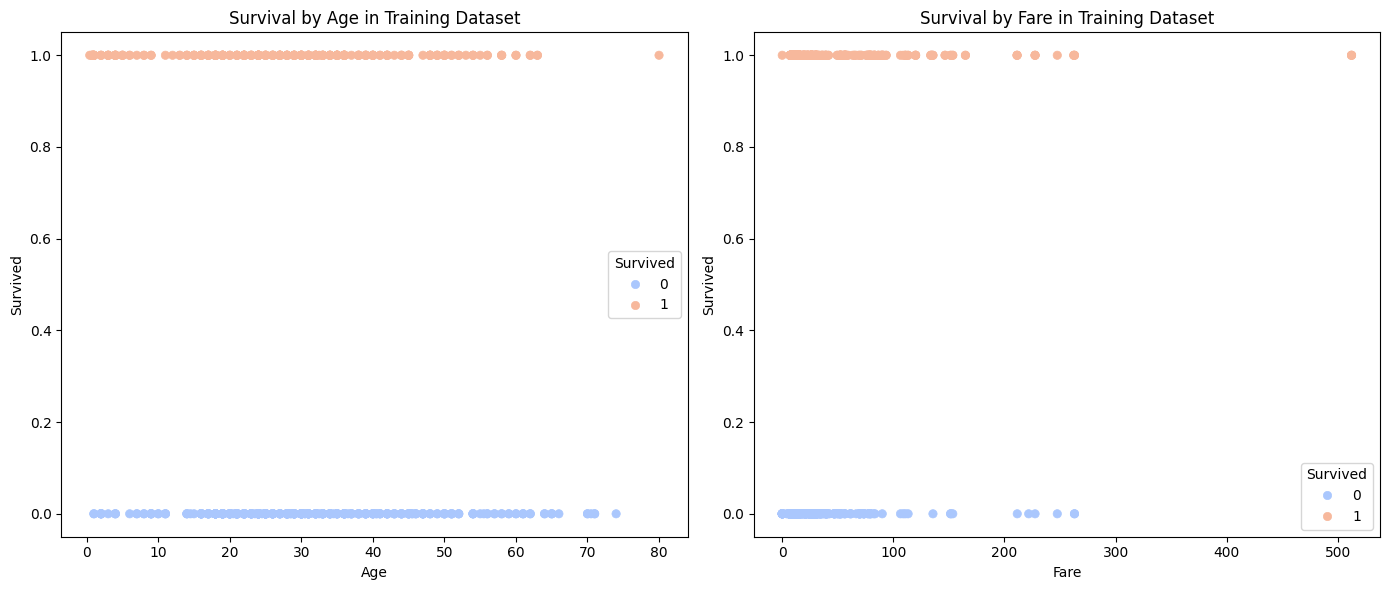

In [ ]:
# Set up the figure size and layout
plt.figure(figsize=(14, 6))  # Adjust the size as needed

# First subplot: Survival by Age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.scatterplot(data=train_df, x='Age', y='Survived', hue='Survived', palette='coolwarm', edgecolor=None)
plt.title('Survival by Age in Training Dataset')
plt.xlabel('Age')
plt.ylabel('Survived')

# Second subplot: Survival by Fare
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.scatterplot(data=train_df, x='Fare', y='Survived', hue='Survived', palette='coolwarm', edgecolor=None)
plt.title('Survival by Fare in Training Dataset')
plt.xlabel('Fare')
plt.ylabel('Survived')

# Display the plots
plt.tight_layout()
plt.show()


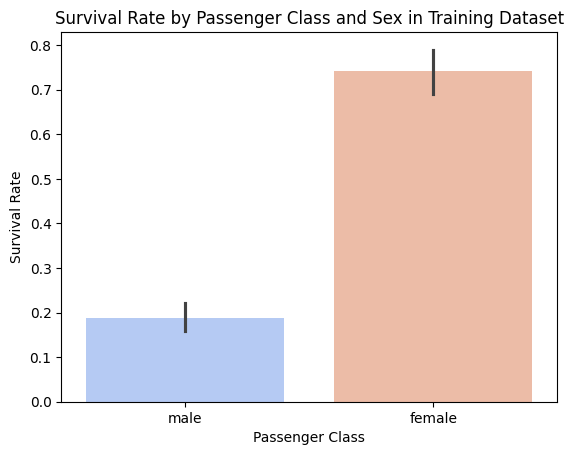

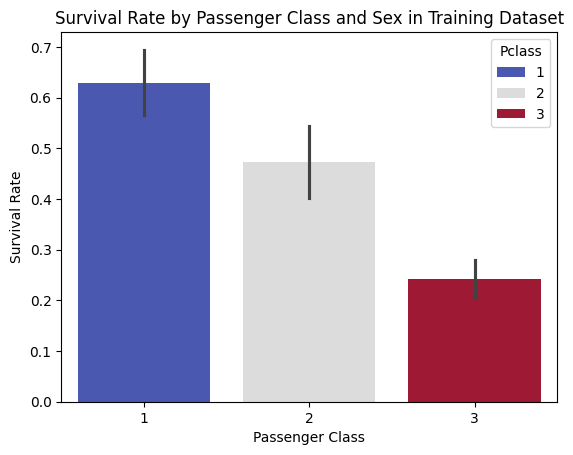

In [ ]:
sns.barplot(data=train_df, x='Sex', y='Survived', hue='Sex', palette='coolwarm')
plt.title('Survival Rate by Passenger Class and Sex in Training Dataset')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

sns.barplot(data=train_df, x='Pclass', y='Survived', hue='Pclass', palette='coolwarm')
plt.title('Survival Rate by Passenger Class and Sex in Training Dataset')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

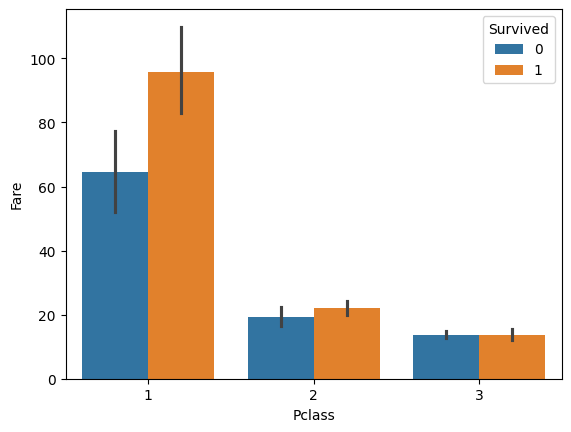

In [ ]:
sns.barplot(data=train_df, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

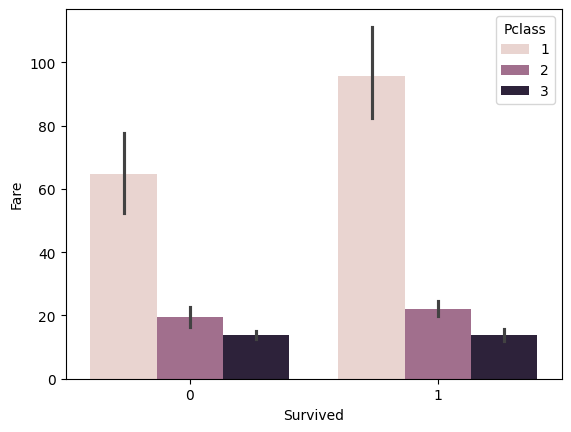

In [ ]:
sns.barplot(data=train_df, x='Survived', y='Fare', hue='Pclass')

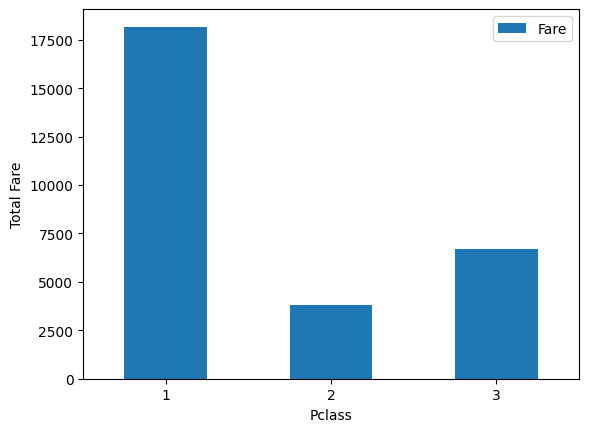

In [ ]:
class_fare = train_df.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

Passenger Class 1 has high passenger count

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## **Data Preprocessing:**

In [ ]:
train_df_len = len(train_df)
# combine two dataframes
df = pd.concat([train_df, test_df], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df = df.drop(columns=['Cabin'], axis=1)

In [ ]:
df['Age'].mean()

29.881137667304014

In [ ]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## **Log transformation for uniform data distribution**

<Axes: xlabel='Fare', ylabel='Density'>

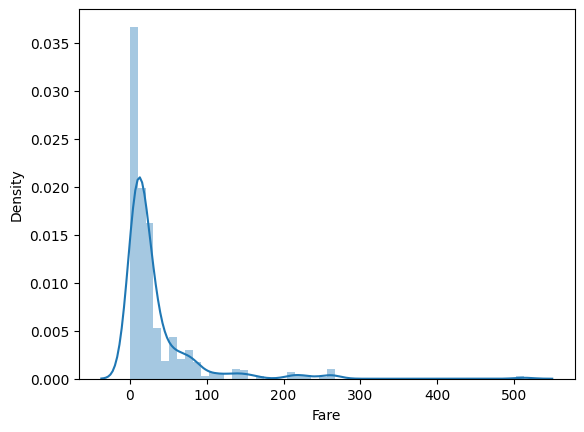

In [ ]:
sns.distplot(df['Fare'])

In [ ]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

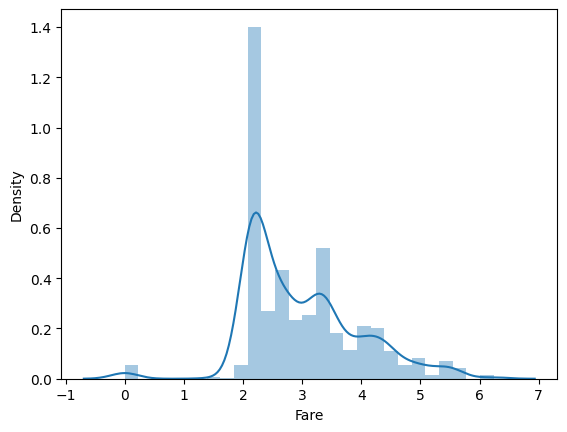

In [ ]:
sns.distplot(df['Fare'])

## **Correlation Matrix**

<Axes: >

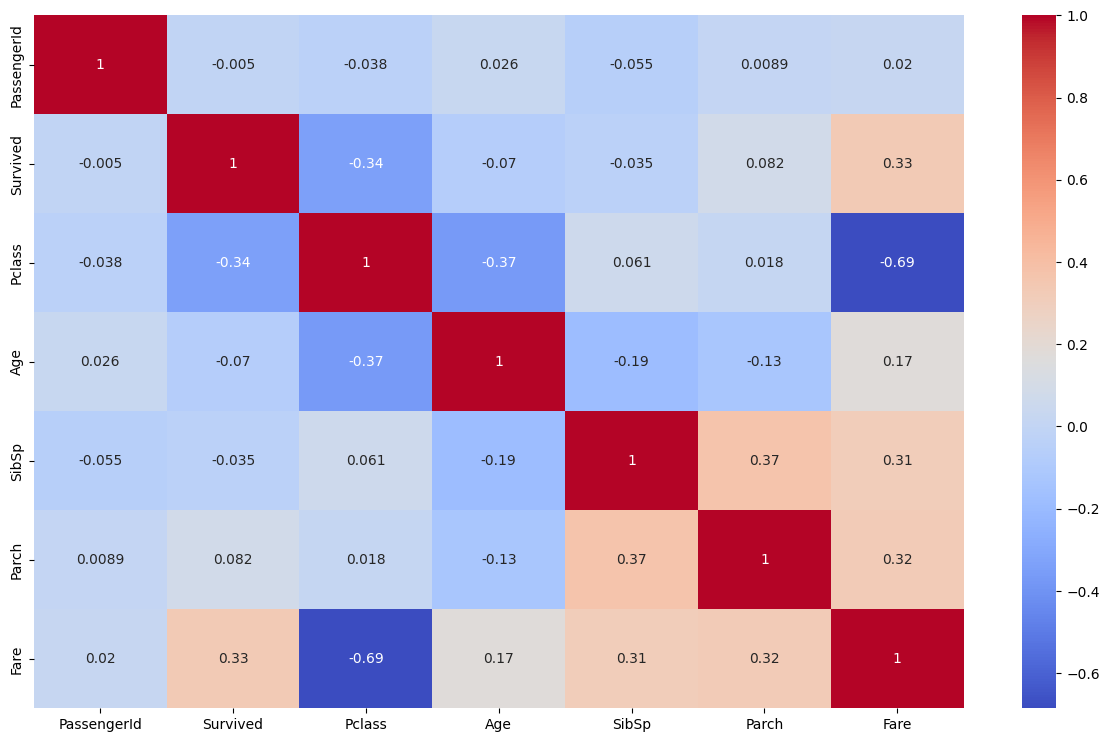

In [ ]:
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
corr = numerical_features.corr()

plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [ ]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## **Train-Test Split**

In [ ]:
train = df.iloc[:train_df_len, :]
test = df.iloc[train_df_len:, :]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [ ]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.726457399103139
CV Score: 0.7733098989391752


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8092461239093591


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## **Complete Model Training with Full Data**

In [ ]:
x = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
model = LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 258, number of negative: 410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386228 -> initscore=-0.463198
[LightGBM] [Info] Start training from score -0.463198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((668, 7), (668,), (223, 7), (223,))

In [ ]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [ ]:
LGBMClassifier(params)

LGBMClassifier(boosting_type={'boosting_type': 'gbdt', 'learning_rate': 0.003,
                              'max_depth': 10, 'metric': 'binary_logloss',
                              'min_data': 50, 'num_leaves': 10,
                              'objective': 'binary', 'sub_feature': 0.5})

In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1.])

In [ ]:
y_pred_series = pd.Series(y_pred)

# Now you can use value_counts()
y_pred_counts = y_pred_series.value_counts()

print(y_pred_counts)

0.0    145
1.0     78
Name: count, dtype: int64


In [ ]:
predictions = [round(value) for value in y_pred]
#predictions

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('LGBM Accuarcy:',accuracy)

LGBM Accuarcy: 0.8565022421524664


In [ ]:
# prompt: e.g., accuracy, precision, recall xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming you have already trained your XGBoost model and have predictions (y_pred)
# and true labels (y_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"LGBM Accuracy: {accuracy}")
print(f"LGBM Precision: {precision}")
print(f"LGBM Recall: {recall}")


LGBM Accuracy: 0.8565022421524664
LGBM Precision: 0.8333333333333334
LGBM Recall: 0.7738095238095238


# **XGBOOST**

In [ ]:
# fit model no training data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

model = XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
y_pred = model.predict(x_test)
y_pred

(596, 7) (596,) (295, 7) (295,)


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('XGBoost accuracy :', accuracy)

XGBoost accuracy : 0.8203389830508474


In [ ]:
#accuracy, precision, recall xgboost

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy}")
print(f"XGBoost Precision: {precision}")
print(f"XGBoost Recall: {recall}")


XGBoost Accuracy: 0.8203389830508474
XGBoost Precision: 0.7589285714285714
XGBoost Recall: 0.7657657657657657


In [ ]:
#dataframe with passenger id and y_pred as servived
import pandas as pd
submission_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': model.predict(test.drop(columns=['PassengerId', 'Survived'], axis=1))})
submission_df.index = range(len(submission_df))
print(submission_df)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


## **Comparative Analysis:**

**1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.**

Based on the performance metrics you provided for both LightGBM and XGBoost, here’s a comparison:

| **Metric**     | **XGBoost**              | **LightGBM**            | **Observation**                                                |
|----------------|--------------------------|-------------------------|----------------------------------------------------------------|
| **Accuracy**   | 0.8203                    | 0.8565                  | LightGBM has higher accuracy, indicating better overall performance. |
| **Precision**  | 0.7589                    | 0.8333                  | LightGBM has higher precision, meaning it has fewer false positives. |
| **Recall**     | 0.7658                    | 0.7738                  | LightGBM has slightly higher recall, meaning it correctly identifies more actual positives. |

### Key Observations:
- **LightGBM outperforms XGBoost** in all the metrics (accuracy, precision, and recall).
- LightGBM's **higher precision** indicates it is better at minimizing false positives, while its slightly higher recall indicates it's also catching more true positives compared to XGBoost.

LightGBM may be the better model in terms of overall performance.



---

2.	**Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.**

To visualize the results, a bar chart can be used to compare the accuracy, precision, and recall of XGBoost and LightGBM. Each bar would represent a performance metric for both models side by side. The **strengths** of LightGBM would be highlighted by its **higher precision and accuracy**, showing that it is better at correctly predicting positives and reducing false positives. However, both models have similar recall, indicating they are equally capable of identifying true positives.

The **weakness** of XGBoost is its relatively **lower precision**, meaning it may produce more false positives, though its recall is still comparable to LightGBM. The visualization helps identify which areas (e.g., precision, recall) each model excels in or needs improvement, providing clear insights into their comparative performance.

